## Running Python on the server

Let's 


Let's look back at the script we wrote earlier that plots the West-to-East topographic profiles across our data. You should copy the code from the Jupyter notebook you were working in before to a new notebook to make sure nothing sneaks into the script:

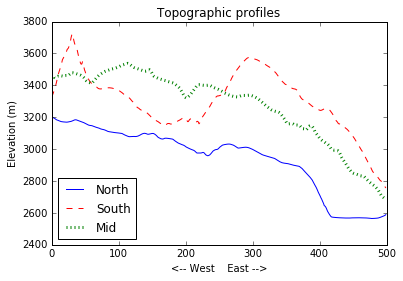

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import urllib

url = "http://bit.ly/csdms_topo"
raw_data = urllib.urlopen(url)

topo = np.loadtxt(raw_data, delimiter=',')

plt.plot(topo[0,:], hold=True, label='North')

plt.plot(topo[-1,:], 'r--', label='South')

plt.plot(topo[len(topo)/2,:], 'g:', linewidth=3, label='Mid')

plt.title('Topographic profiles')
plt.ylabel('Elevation (m)')
plt.xlabel('<-- West    East -->')
plt.legend(loc = 'lower left')

plt.show()

We can convert this code into a command-line Python script in two different ways:

* Export the Jupyter notebook as a `.py` file [File -> Download As -> Python (.py)]
* Copy the script and paste it into a simple text file (using a text editor like TextWrangler or Notepad++) and save the file with a `.py` extension

Go ahead and convert your Jupyter notebook into a `.py` file using whichever method is easier. Call your file `topo_profiler.py` and make sure that the file is in the same directory that contains the folder `data` where the file `topo.asc` is. Then open the file `topo_profiler.py` in your chosen text editor. Most code-friendly text editors will color the text in the file according to the language they are written in!

If you exported the file through the Jupyter notebook menu, any Markdown (text) cells should be prefixed with a `#`. These are comments and the Python interpreter will not read them. You should also see some lines that look like this: `# In[ ]:`. These are line numbers from the Jupyter notebook and are also commented out.

Open a new Bash window and navigate (using `cd`, `ls` and `pwd`) to the directory that contains your `topo_profiler.py` file. To run the script from the command line, type:

In [ ]:
$ python topo_profiler.py

Python read the contents of the text file `topo_profiler.py` and tried to run the script, but it produced an error:

In [ ]:
Traceback (most recent call last):
  File "topo_profiler.py", line 19, in <module>
    get_ipython().magic(u'matplotlib inline')
NameError: name 'get_ipython' is not defined

If you copied and pasted the code from the notebook to the text file instead of exporting it, it produced this error instead:

In [ ]:
  File "topo_profiler.py", line 20
    %matplotlib inline
    ^
SyntaxError: invalid syntax

The iPython magic command `%matplotlib inline` makes plots appear within the Jupyter notebook instead of in a separate window, but the regular Python interpreter doesn't understand iPython magic commands. Go into the text file and comment out this line. In many text editors, the shortcut Command-/ (or Control-/) will comment out a line. You can also just add a # at the start of the line.

Now run the script again. Python opened up a window that shows the figure we could see inside the notebook. There are some tools along the bottom of this window that you can use to navigate and save the figure.

Notice that the Bash window doesn't show a `$` before the text prompt while the figure window is open. This shows that Bash is "busy" and won't respond until you close the figure (you can open a new Bash window if you need to run something while the figure is open). The Python code is also paused -- it will wait until the figure is closed to continue past the `plt.show()` line!

## Deprecation warnings {.callout}

The Bash window might be showing a message like this:

In [ ]:
2016-05-09 13:31:40.589 python[15942:2318986] setCanCycle: is deprecated.  Please use setCollectionBehavior instead

A command that's deprecated is one that you are discuraged from using because it's been replaced by something else. The command still runs, though, but it might stop working in the future. If the deprecated command is i code, you should fix it so it stops warning you and doesn't break later on. If it's not in your own code, then ignore the warning and update your Python distribution soon.

Close the figure window. The Python script will continue running until it reaches the end and exits. You should now have the `$` prompt back in your Bash window. This means that you can run commands again.

If you want your script to open multiple figure windows at the same time, you need to number your figures using `plt.figure()`. Let's modify the script so it makes separate figures for each profile instead of a single one. We only need call `plt.show()` once, after all of the figures have been defined:

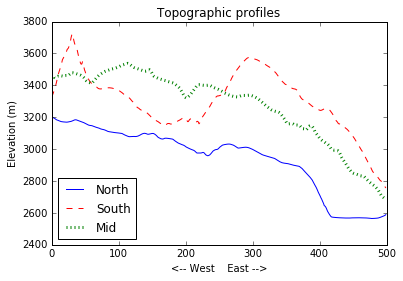

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# get_ipython().magic(u'matplotlib inline')

topo = np.loadtxt('data/topo.asc', delimiter=',')

plt.figure(0)
plt.plot(topo[0,:], hold=True, label='North')

plt.figure(1)
plt.plot(topo[-1,:], 'r--', label='South')

plt.figure(2)
plt.plot(topo[len(topo)/2,:], 'g:', linewidth=3, label='Mid')

plt.title('Topographic profiles')
plt.ylabel('Elevation (m)')
plt.xlabel('<-- West    East -->')
plt.legend(loc = 'lower left')

plt.show()

Only figure 2 has a title, legend, and axis labels because they are defined only once, while figure 2 is active.

Go back into the script and change it so it only produces one plot with all three profiles, as it did before. Run it again to check.

For a short script running locally, we can easily use the buttons in the figure window to save our figure to a file. However, this is not practical if the script takes a long time to run or if we have to run multiple scripts in a row. It is also not always possible to interact (or even see!) the figure window when running code on a remote server. To save the figure automatically, we can replace `plt.show()` by the Matplotlib `savefig` function:

In [3]:
#plt.show()
plt.savefig('data/profiles.png')

Instead of opening a figure window, your script will create a new file inside the `data` directory and run smoothly to completion.

## First Save, then Show {.callout}

You might be interested in having your script save the figure and still show it as an interactive figure window. Every plotting command in our script adds data to a memory buffer. Waiting until all lines are plotted before showing the figure is more efficient than repeatedly redrawing the figure. The function `plt.close()` (or closing the interactive figure window) empties that buffer. If we want to save the figure, we need to include the `plt.savefig()` command before the memory buffer empties.

If your script creates and saves multiple figures, it is often a good idea to include `plt.close()` after `plt.savefig()` to force the memory buffer to empty and let your script run faster.